# Context:

AllLife Bank has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

You as a Data scientist at AllLife bank has to build a model that will help marketing department to identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.



# Objective:

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

# Dataset

ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Universal Bank?


Scoring guide (Rubric) - Personal Loan Campaign Modelling
Criteria	Points
Perform an Exploratory Data Analysis on the data
- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive
5
Illustrate the insights based on EDA
Key meaningful observations on the relationship between variables
5
Data Pre-processing
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed), Feature Engineering, Prepare data for modelling and check the split
4
Model building - Logistic Regression
- Build the model and comment on the model statistics - Test assumptions - Filter out key variables that have a strong relationship with the dependent variable
10
Model performance evaluation and improvement
- Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? if yes then do it
5
Model building - Decision Tree
- Build the model and comment on the model statistics - Identify the key variables that have a strong relationship with the dependent variable
5
Model performance evaluation and improvement
- Evaluate the model on appropriate metric - Comment on model performance - Can model performance be improved? if yes then do it
5
Actionable Insights & Recommendations
- Compare decision tree and Logistic regression - Conclude with the key takeaways for the marketing team - what would your advice be on how to do this campaign?
5
Misclassification analysis
- Do an analysis of all misclassified samples (original label = 0 but model predicted it as 1) - Try to find a pattern among those
4
Report - Overall quality
- Structure and flow - Crispness - Visual appeal - Key insights and recommendations
8
Notebook - Overall
- Conclude with the key takeaways for the business - What would your advice be to grow the business?
4

### Import the necessary packages

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

### Read the dataset

In [129]:
customers = pd.read_csv('Loan_Modelling.csv')

In [130]:
# copying data to another varaible to avoid any changes to original data
data=customers.copy()

### View the first and last 10 rows of the dataset.

In [131]:
data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [132]:
data.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


### Understand the shape of the dataset.

In [133]:
data.shape

(5000, 14)

### Let's check the duplicate data. And if any, we should remove it.

In [134]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Check the data types of the columns for the dataset.

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Fixing the data types
*Family and Education can be  conevtered to categories, to save some memory


In [136]:
#data["Family"] = data["Family"].astype("category")
#data["Education"] = data["Education"].astype("category")


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Check for missing values

In [138]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in the data.

### Give a statistical summary for the dataset.

In [139]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* All the numerical variables seem to be right-skewed.
* Most features are boolean and can be one-hot encoded


In [140]:
#delete years of negative expereince?
print(data.Experience.value_counts())
#total 54 rows will be deleted
#df=data[data['Experience']<0].#drop(axis=0,inplace=True)
#data=data.drop(data[data['Experience']<0],axis=0,inplace=True)
df=data
#df = df.drop(df[df['Experience'] < 0].index, inplace=True)
#print(df.Experience.value_counts())
##df[df.select_dtypes(include=[np.number]).ge(0).[df['Experience'](1)]
#print(data.Experience.value_counts())

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64


In [142]:
#data.describe(include=['category','bool'])

In [143]:
print(data.Age.value_counts())
print(data.ZIPCode.value_counts())
print(data.Family.value_counts())
print(data.Education.value_counts())
print(data.Personal_Loan.value_counts())
print(data.Securities_Account.value_counts())
print(data.CD_Account.value_counts())
print(data.Online.value_counts())
print(data.CreditCard.value_counts())



35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94970      1
92694      1
94404      1
94598      1
94965      1
Name: ZIPCode, Length: 467, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal_Loan, dtype: int64
0    4478
1     522
Name: Securities_Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0   

Most features are boolean type.

### EDA

### Univariate analysis

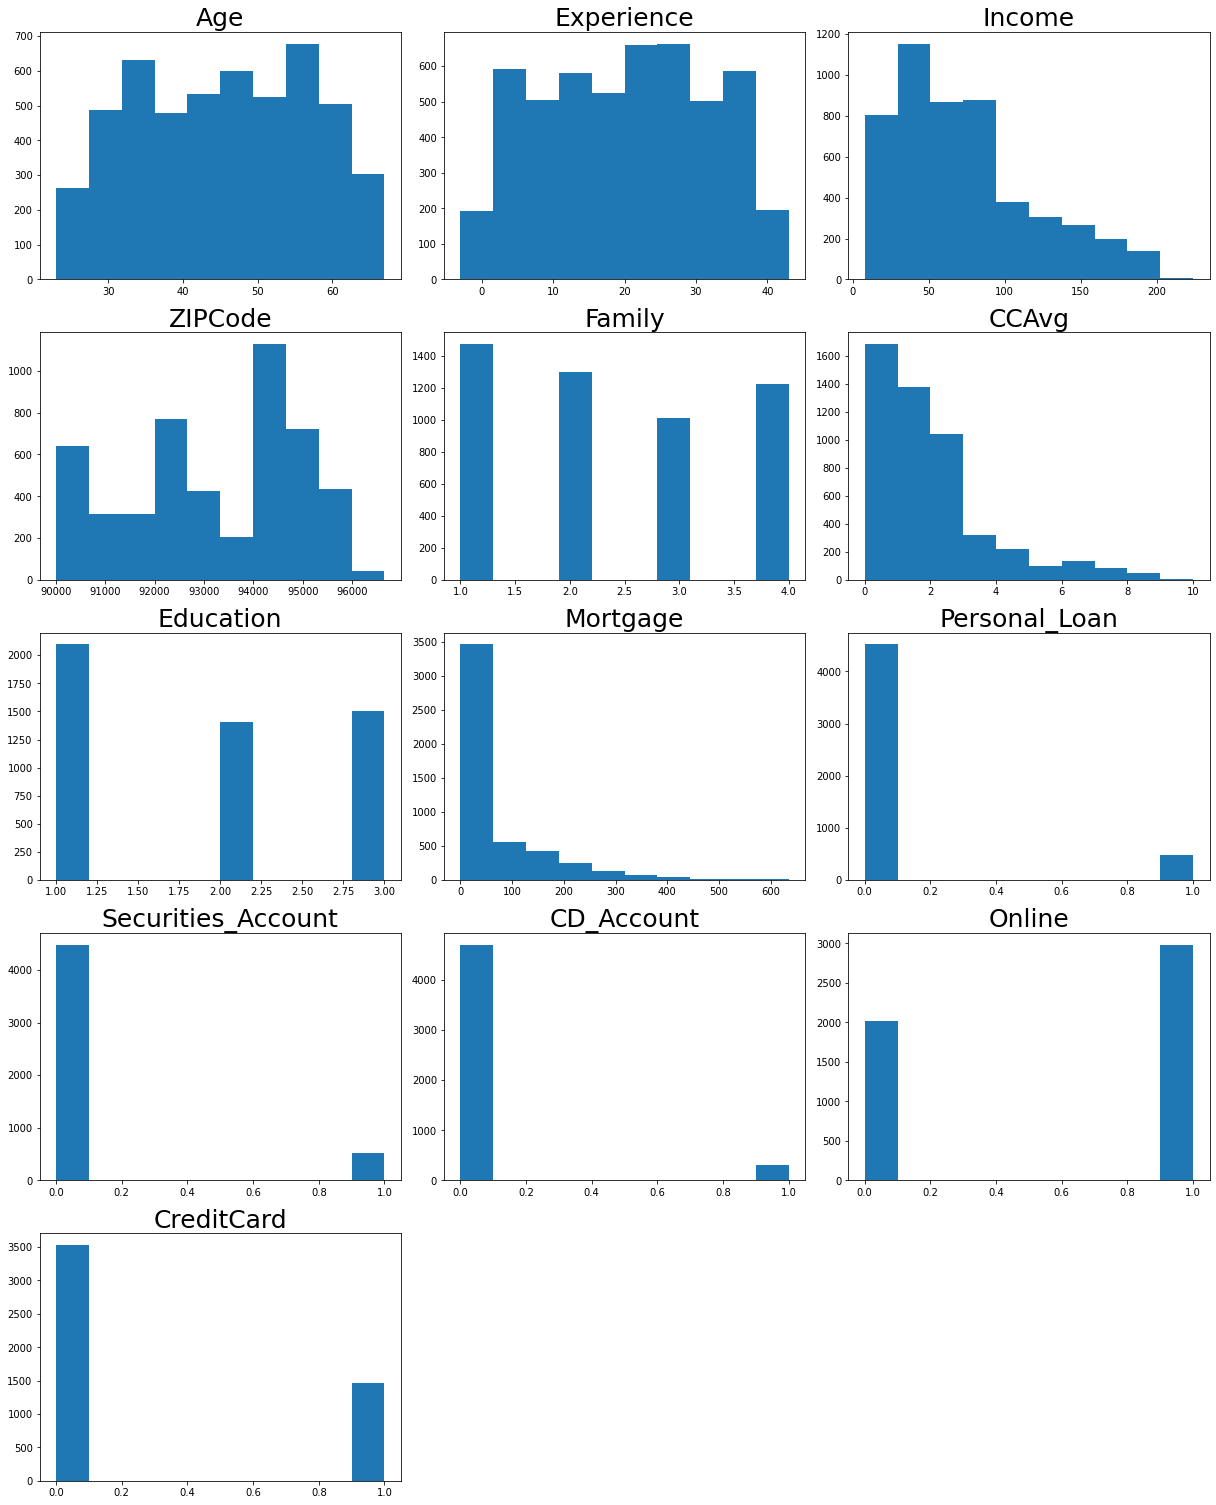

In [144]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = data.select_dtypes(include=np.number).columns.tolist()
all_col.remove('ID')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(data[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    
plt.show()

Age and Experience looks uniformaly disributed.  Income and CCAvg looks rightly skewed. Most other features are boolean.

In [145]:
print(data.Personal_Loan.value_counts())
print(data.Securities_Account.value_counts())
print(data.CD_Account.value_counts())
print(data.Online.value_counts())
print(data.CreditCard.value_counts())

0    4520
1     480
Name: Personal_Loan, dtype: int64
0    4478
1     522
Name: Securities_Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


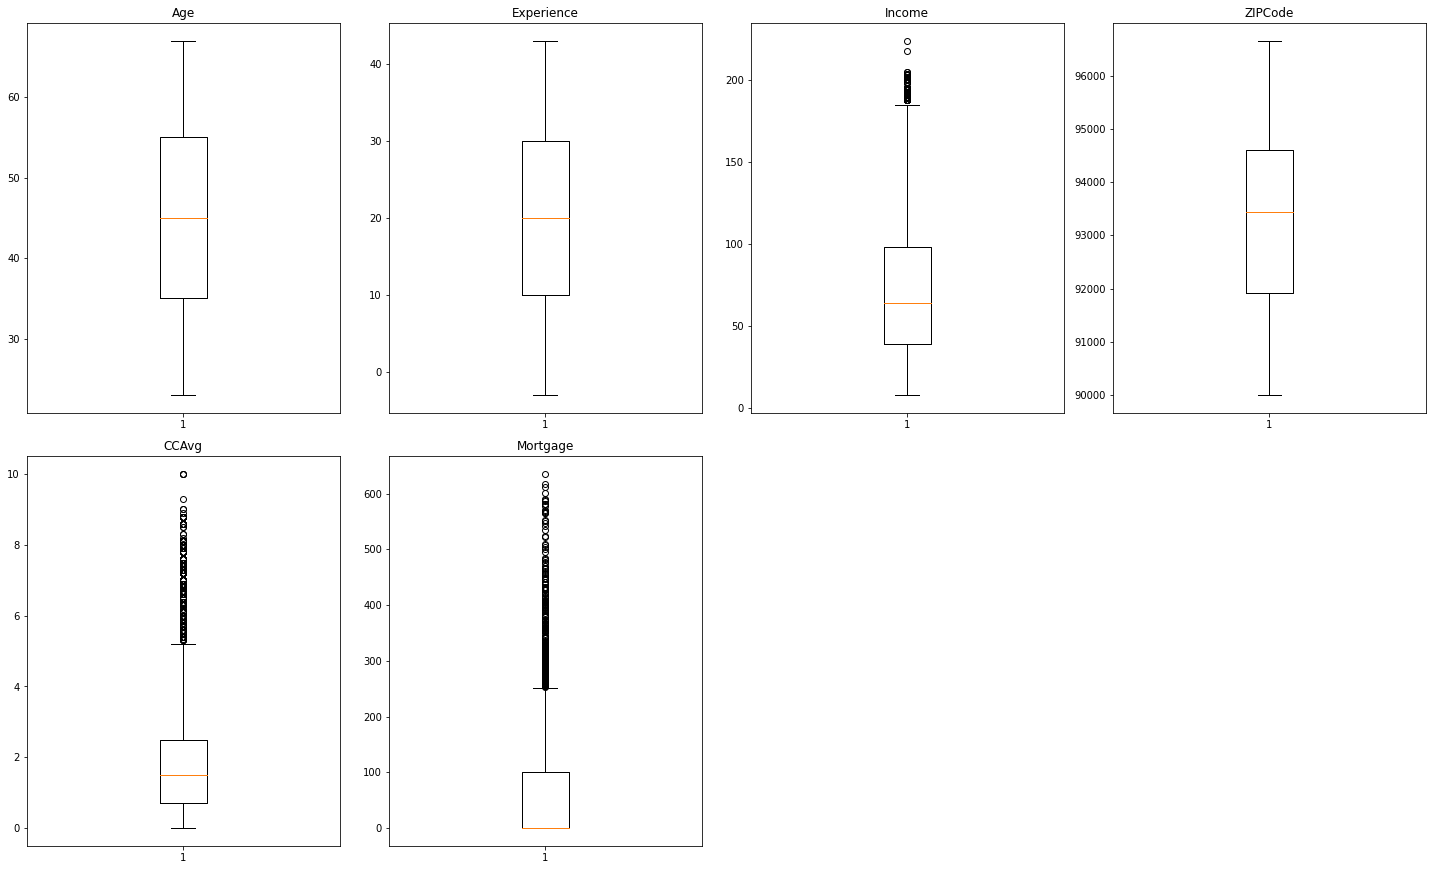

['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


In [146]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

numeric_columns = ['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()
print(numeric_columns)

CCavg and Martgage have a lot of outliers. We will leave them in the dataset

In [147]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Numerical countplots

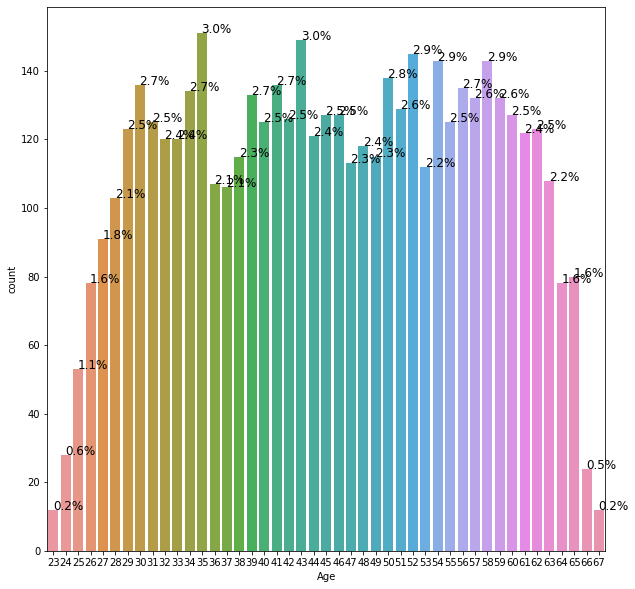

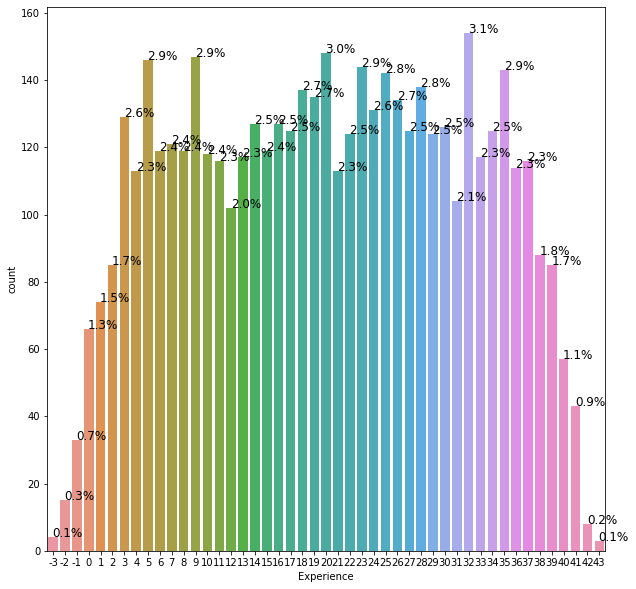

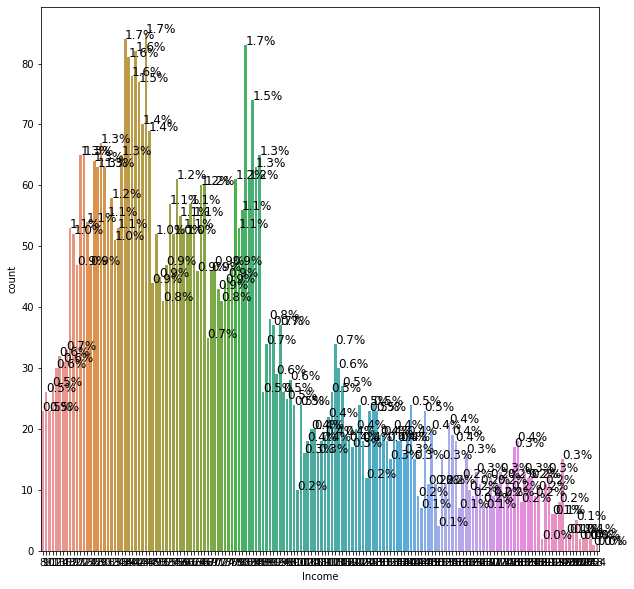

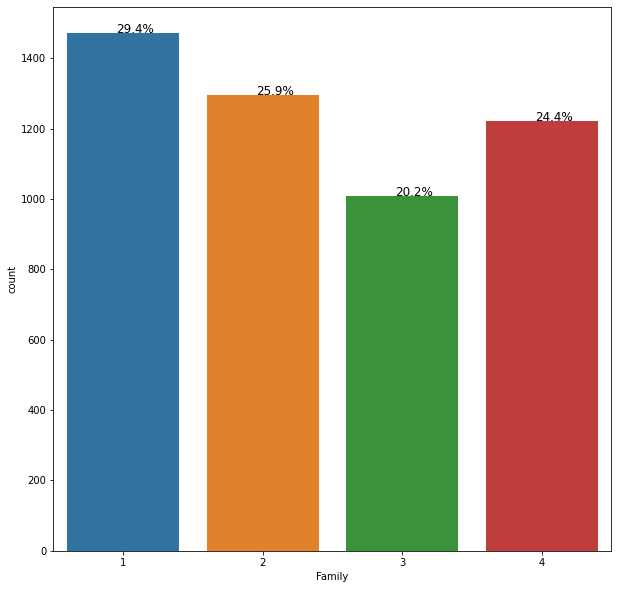

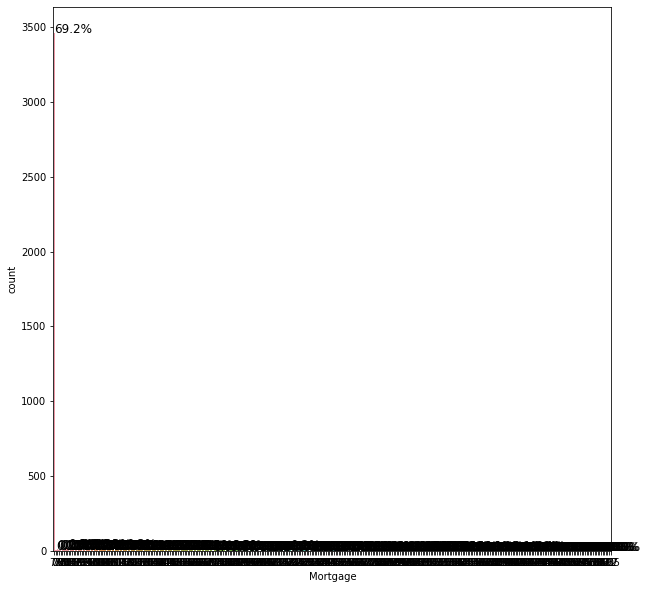

<Figure size 720x720 with 0 Axes>

In [148]:
plt.figure(figsize=(10,10))
select_columns = ['Age','Experience','Income','Family','Mortgage']

for i, variable in enumerate(select_columns):
                     ax = sns.countplot(data[select_columns[i]])
                     perc_on_bar(ax,data[select_columns[i]]) 
                     plt.figure(figsize=(10,10))

plt.show()

##Observations on Correlation with Heatmap

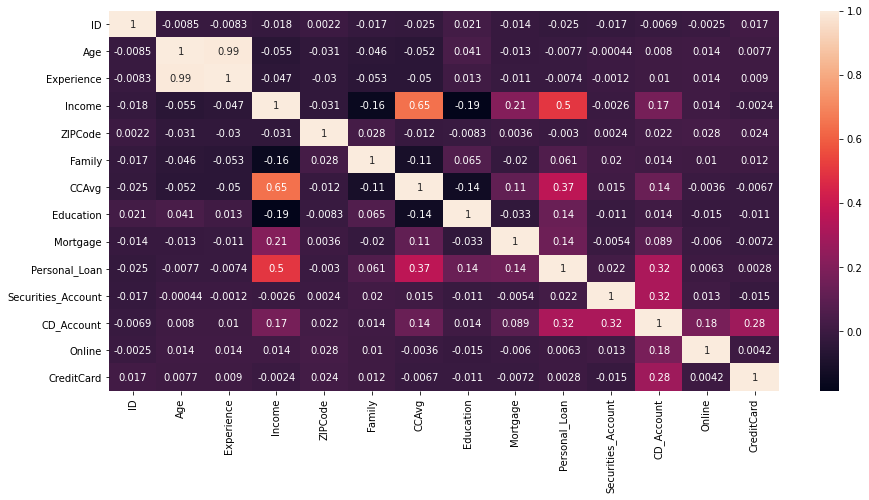

In [149]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

* Personal oan has the highest correlation with Income, followed by CCAvg and CD_account
* Age and Experience are very highly corelated with each other, so one of these features will be dropped.
*Income and CC_Avg are highly mutually correlated

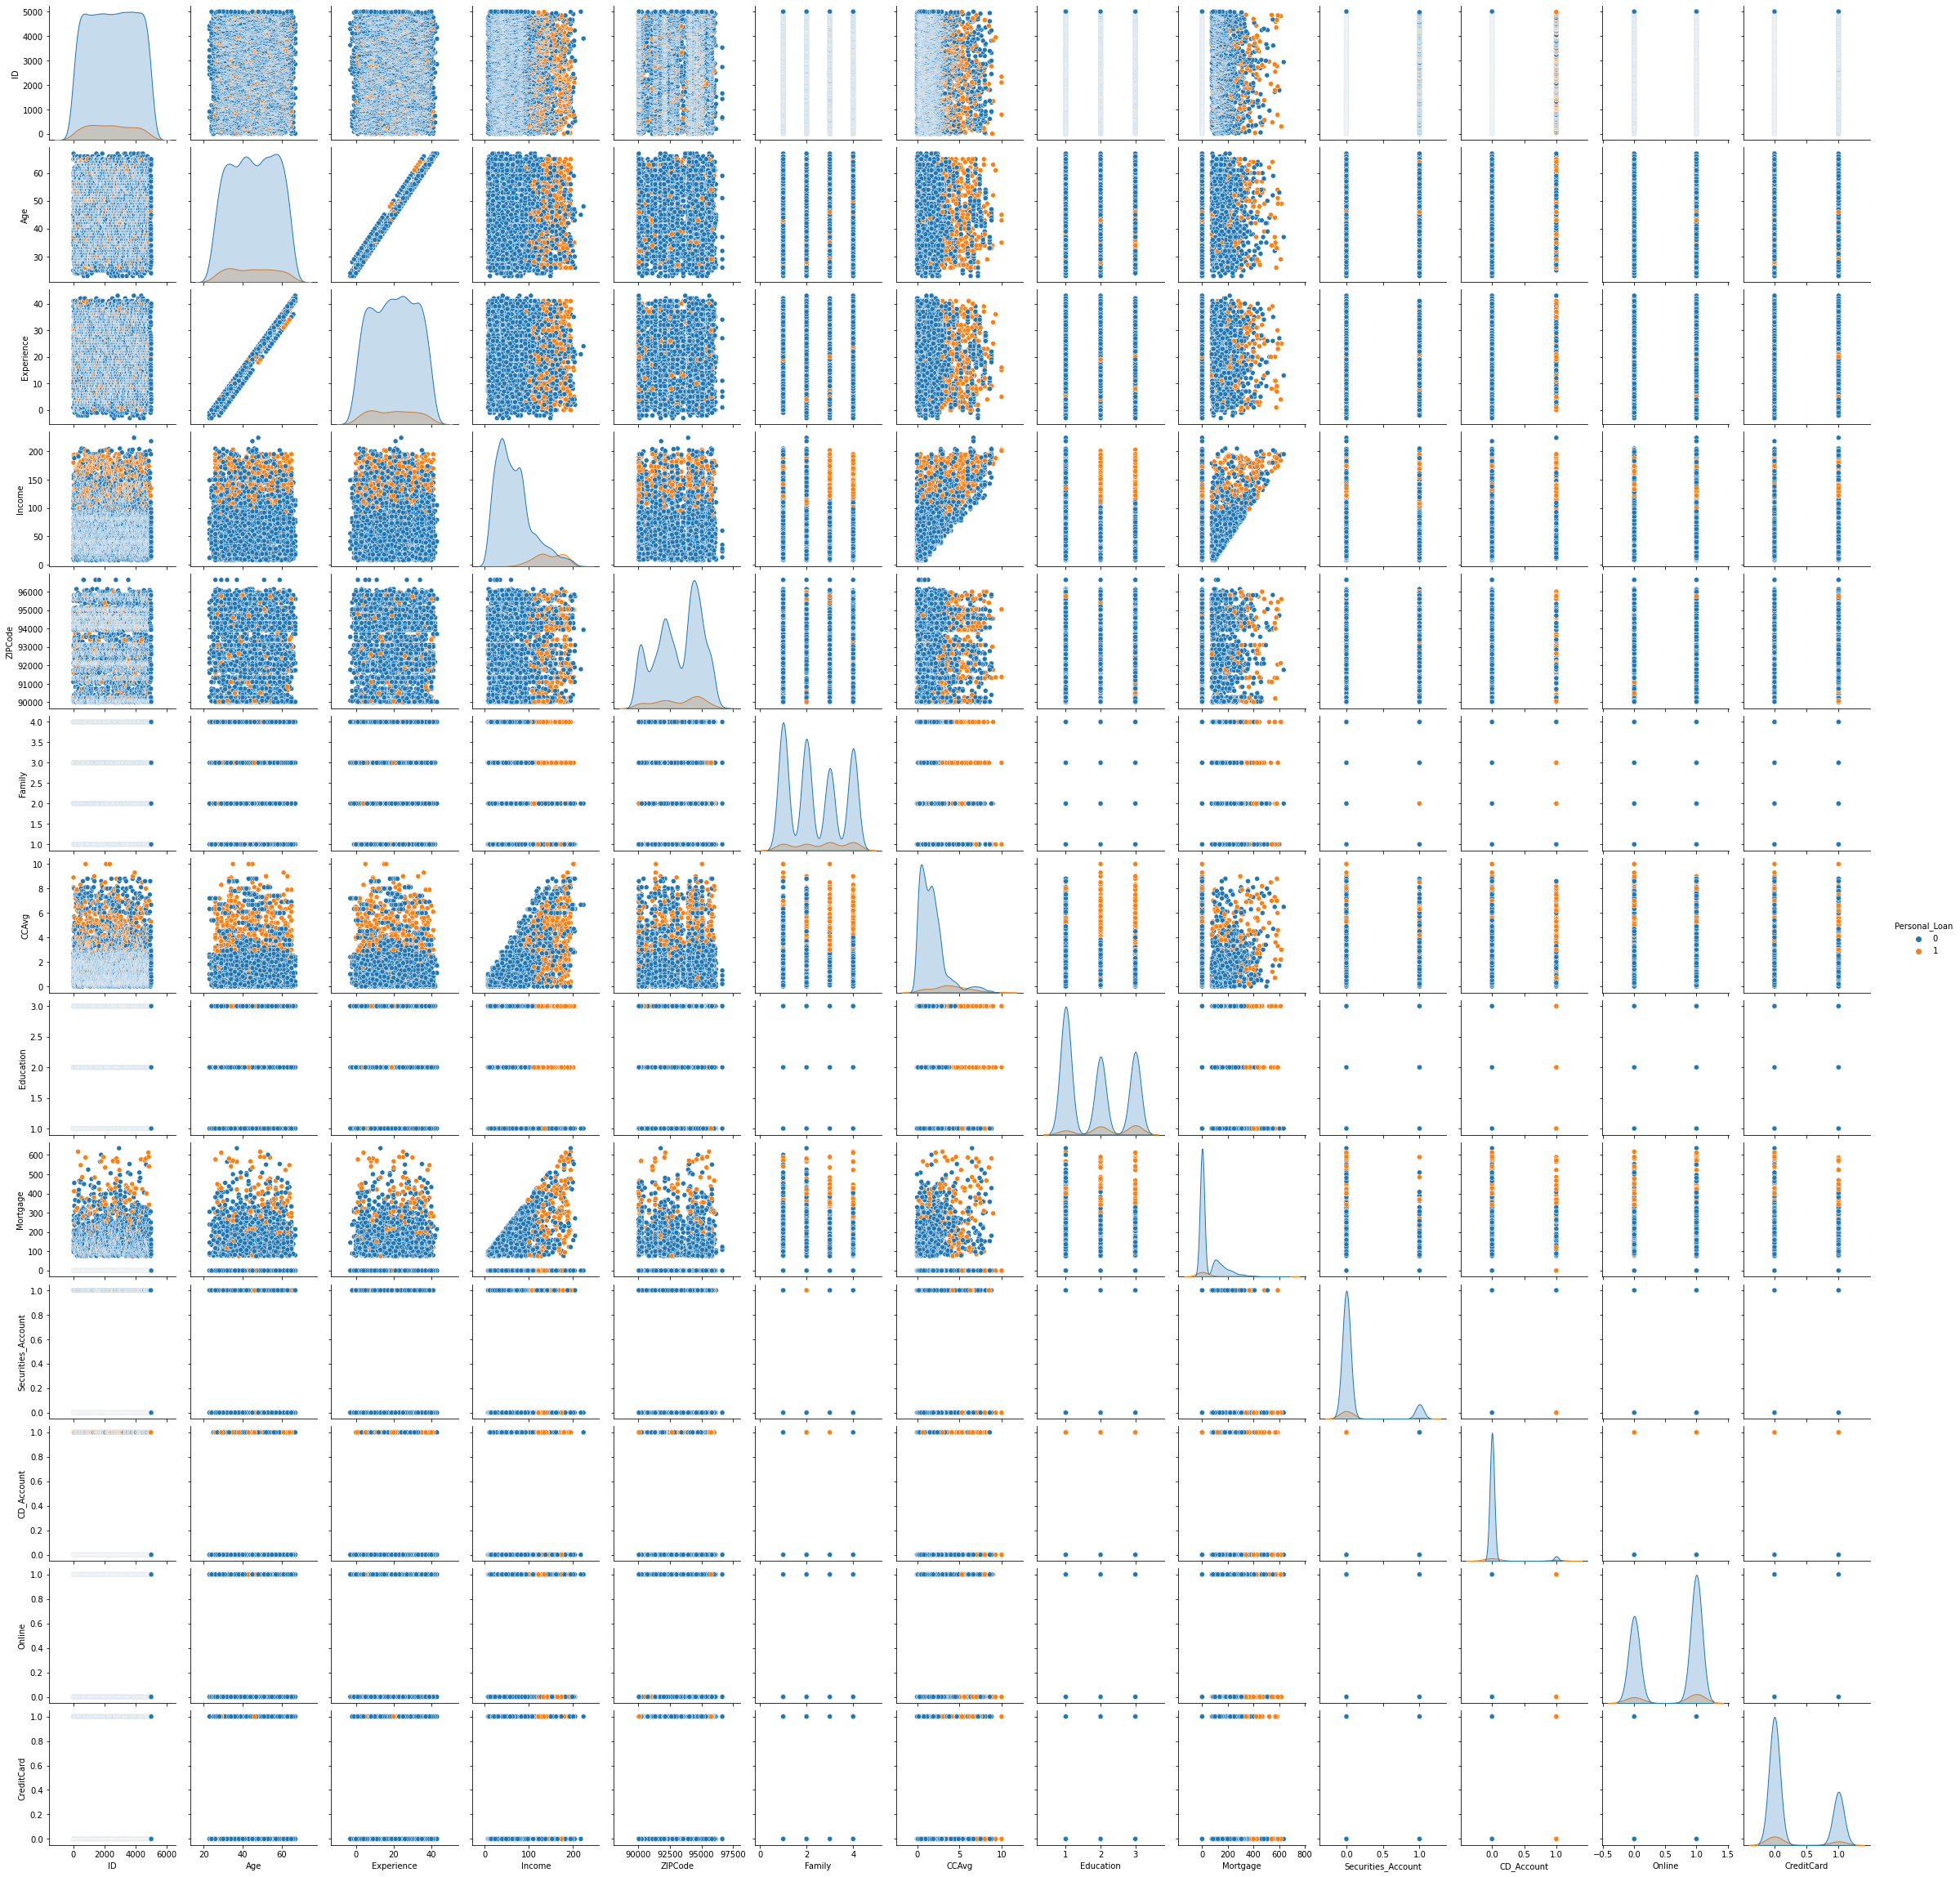

In [150]:
#Lets see these correlations on pairplot
sns.pairplot(data=data,hue="Personal_Loan")
plt.show()

* With hue of Personal loans,the data imbalance is clear in each feature, with minoriy class of no loans taken
* Age and Experience are very highly corelated with each other, so one of these features will be dropped.
* When someone has a CD_Account, the probability of them having take a personal loan is high
*Income and CC_Avg are highly mutually correlated
*Income and Mortagage are highly mutually correlated, with no outliers
* Family with 2 or more kids have higher probability of taking a personal loan
* Education level of 2 and up have higher probability of taking a personal loan

### Data Preperation

In [153]:
dummy_data = pd.get_dummies(data, columns=['Family','Education','Securities_Account','CD_Account','Online','CreditCard'],drop_first=True)
dummy_data.head()

,ID,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,1,25,1,49,91107,1.6,0,0,0,0,1,0,0,1,0,0,0
1,2,45,19,34,90089,1.5,0,0,0,1,0,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,2.7,0,0,0,0,0,1,0,0,0,0,0
4,5,35,8,45,91330,1.0,0,0,0,0,1,1,0,0,0,0,1


## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

In [154]:
column_names = list(dummy_data.columns)
column_names.remove('Personal_Loan')                     # Keep only names of features by removing the name of target variable
column_names.remove('ID') 
column_names.remove('Experience')   
feature_names = column_names
print(feature_names)
dummy_data.drop('ID',axis=1)
dummy_data.drop('Experience',axis=1)   # highly corelated with age


['Age', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


,ID,Age,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,1,25,49,91107,1.6,0,0,0,0,1,0,0,1,0,0,0
1,2,45,34,90089,1.5,0,0,0,1,0,0,0,1,0,0,0
2,3,39,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,100,94112,2.7,0,0,0,0,0,1,0,0,0,0,0
4,5,35,45,91330,1.0,0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1.9,0,0,0,0,0,0,1,0,0,1,0
4996,4997,30,15,92037,0.4,85,0,0,0,1,0,0,0,0,1,0
4997,4998,63,24,93023,0.3,0,0,1,0,0,0,1,0,0,0,0
4998,4999,65,49,90034,0.5,0,0,0,1,0,1,0,0,0,1,0


## Split Data

In [155]:
X = dummy_data.drop('Personal_Loan',axis=1)                                                 # Features
y = dummy_data['Personal_Loan'].astype('int64')                                             # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [156]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 16) (1500, 16)


#Logisitic Regression Model

In [157]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit = sm.Logit( y_train, X_train )

lg = logit.fit()

print(lg.summary2())

# Let's Look at Model Performance
y_pred = lg.predict(X_train) 
pred_train = list(map(round, y_pred))

y_pred1 = lg.predict(X_test) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.107435
         Iterations 10
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.657      
Dependent Variable:   Personal_Loan     AIC:               786.0448   
Date:                 2021-04-16 21:55  BIC:               890.7736   
No. Observations:     3500              Log-Likelihood:    -376.02    
Df Model:             16                LL-Null:           -1095.5    
Df Residuals:         3483              LLR p-value:       7.1236e-297
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                -12.4948   5.5310 -2.2591 0.0239 -23.3353 -1.6542
ID

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                   3273.944020
ID                         1.004123
Age                       96.391733
Experience                96.303885
Income                     1.895744
ZIPCode                    1.007376
CCAvg                      1.742701
Mortgage                   1.047352
Family_2                   1.402783
Family_3                   1.385411
Family_4                   1.426929
Education_2                1.302984
Education_3                1.345607
Securities_Account_1       1.148015
CD_Account_1               1.364334
Online_1                   1.041426
CreditCard_1               1.112391
dtype: float64



In [159]:
#ZIPCode has highest p values among those with p-value greater than 0.05
X_train1 = X_train.drop('ZIPCode', axis =1)
X_test1 = X_test.drop('ZIPCode',axis =1)

logit1 = sm.Logit(y_train, X_train1 )
lg1 = logit1.fit()
print(lg1.summary2())

# Let's Look at Model Performance
y_pred = lg1.predict(X_train1) 
pred_train = list(map(round, y_pred))

y_pred1 = lg1.predict(X_test1) 
pred_test = list(map(round, y_pred1))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.107435
         Iterations 10
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.657      
Dependent Variable:   Personal_Loan     AIC:               784.0463   
Date:                 2021-04-16 21:55  BIC:               882.6146   
No. Observations:     3500              Log-Likelihood:    -376.02    
Df Model:             15                LL-Null:           -1095.5    
Df Residuals:         3484              LLR p-value:       7.1535e-298
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                -12.6899   2.2588 -5.6180 0.0000 -17.1170 -8.2628
ID


Not much change in recall, let's drop Family 

In [160]:
#Family has highest p values among those with p-value greater than 0.05
X_train2 = X_train1.drop(['Family_2','Family_3','Family_4'], axis =1)
X_test2 = X_test1.drop(['Family_2','Family_3','Family_4'], axis =1)

logit2 = sm.Logit(y_train, X_train2 )
lg2 = logit2.fit()
print(lg2.summary2())

# Let's Look at Model Performance
y_pred = lg2.predict(X_train2) 
pred_train = list(map(round, y_pred))

y_pred1 = lg2.predict(X_test2) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.121316
         Iterations 9
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.612      
Dependent Variable:   Personal_Loan     AIC:               875.2143   
Date:                 2021-04-16 21:55  BIC:               955.3010   
No. Observations:     3500              Log-Likelihood:    -424.61    
Df Model:             12                LL-Null:           -1095.5    
Df Residuals:         3487              LLR p-value:       5.1195e-280
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                -10.6699   2.0908 -5.1032 0.0000 -14.7679 -6.5720
ID 

In [161]:
#Age has highest p values among those with p-value greater than 0.05
X_train3 = X_train2.drop('Age', axis =1)
X_test3 = X_test2.drop('Age',axis =1)

logit3 = sm.Logit(y_train, X_train3 )
lg3 = logit3.fit()
print(lg3.summary2())

# Let's Look at Model Performance
y_pred = lg3.predict(X_train3) 
pred_train = list(map(round, y_pred))

y_pred1 = lg3.predict(X_test3) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.121326
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.612      
Dependent Variable:    Personal_Loan     AIC:               873.2807   
Date:                  2021-04-16 21:55  BIC:               947.2069   
No. Observations:      3500              Log-Likelihood:    -424.64    
Df Model:              11                LL-Null:           -1095.5    
Df Residuals:          3488              LLR p-value:       4.6798e-281
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        9.0000                                          
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
const                -11.1844   0.6113 -18.2973 0.0000 -12.3825

recall on train is same
So lg3 is the final model that we will use for predictions and inferences
Let's use model 'lg3' for making interpretations
As per lg3, Age, Duration, Housing, Savings accounts, checking accounts are important variables here

All variables except Duration have negative signs, i.e increase in these will lead to decrease in chances of default

1 unit increase in Age decreases the odds of being defaulter by 3.03%

This relates to changes in probability by .75

Similarly for all the other variables

Please note that when coefficient is b , than change in odds is (exp(b)-1)*100 %

Probability = odd/(1+odd)

Check Model Performance

In [162]:
# Let's Look at Model Performance
y_pred = lg3.predict(X_train3) 
pred_train = list(map(round, y_pred))

y_pred1 = lg3.predict(X_test3) 
pred_test = list(map(round, y_pred1))

In [163]:
#Model performance with 0.5 threshold

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.9611428571428572
Accuracy on test data: 0.954
Recall on train data: 0.6737160120845922
Recall on test data: 0.610738255033557
Precision on train data: 0.8884462151394422
Precision on test data: 0.8921568627450981
f1 score on train data: 0.7663230240549828
f1 score on test data: 0.7250996015936254


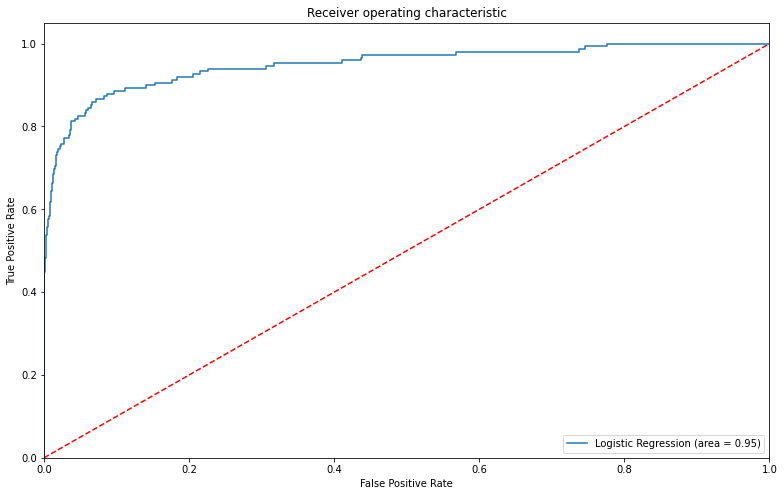

In [164]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Try to improve Recall using AUC-ROC curve

In [165]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.12330383051949514


In [166]:
# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

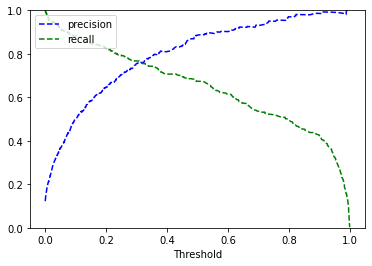

In [167]:
from sklearn.metrics import precision_recall_curve

y_scores=lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores, )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [168]:
optimal_threshold = 0.2

# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.9485714285714286
Accuracy on test data: 0.9453333333333334
Recall on train data: 0.8429003021148036
Recall on test data: 0.7919463087248322
Precision on train data: 0.6855036855036855
Precision on test data: 0.6982248520710059
f1 score on train data: 0.7560975609756097
f1 score on test data: 0.7421383647798743


In [169]:
from sklearn.metrics import classification_report,confusion_matrix



def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

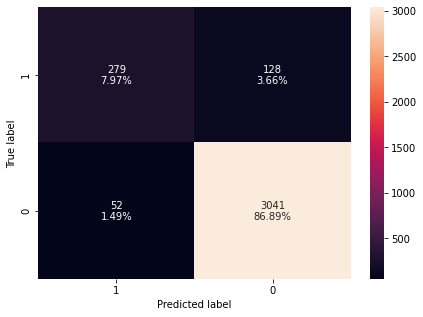

In [170]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train_opt)

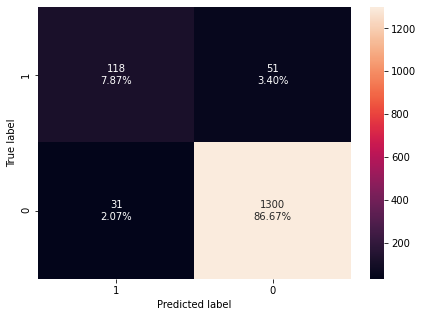

In [171]:
make_confusion_matrix(y_test,pred_test_opt)

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [172]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [173]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.15, 1: 0.85},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [174]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

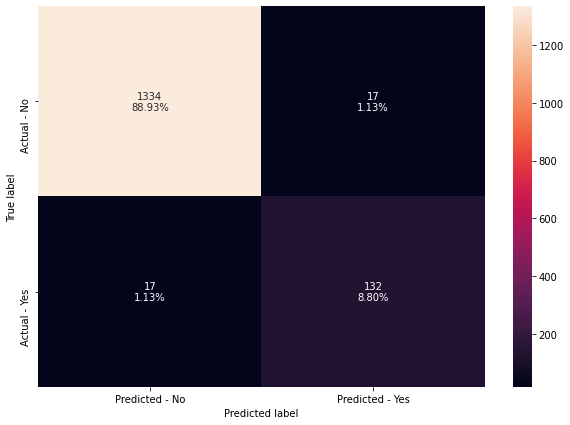

In [175]:
make_confusion_matrix(model,y_test)

In [176]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

We only have 15% of positive classes, so if our model marks each sample as negative, then also we'll get 84% accuracy, hence accuracy is not a good metric to evaluate here.

### Insights:

- **True Positives:**
    - Reality: A customer made a purchase.
    - Model predicted: The customer will contribute to revenue.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT make a purchase.
    - Model predicted: The customer will NOT contribute to revenue.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT make a purchase.
    - Model predicted: The customer will contribute to revenue.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the revenue.

- **False Negatives:**
    - Reality: A customer made a purchase.
    - Model predicted: The customer will NOT contribute to revenue.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer come again to purchase. (Customer retention will get affected.)

* In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.

In [177]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [178]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8859060402684564


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Visualizing the Decision Tree

In [179]:
#feature_names = feature_names + ['Experience'] #Adding Experience back to features list as required by code below

In [180]:
feature_names = column_names

IndexError: ignored

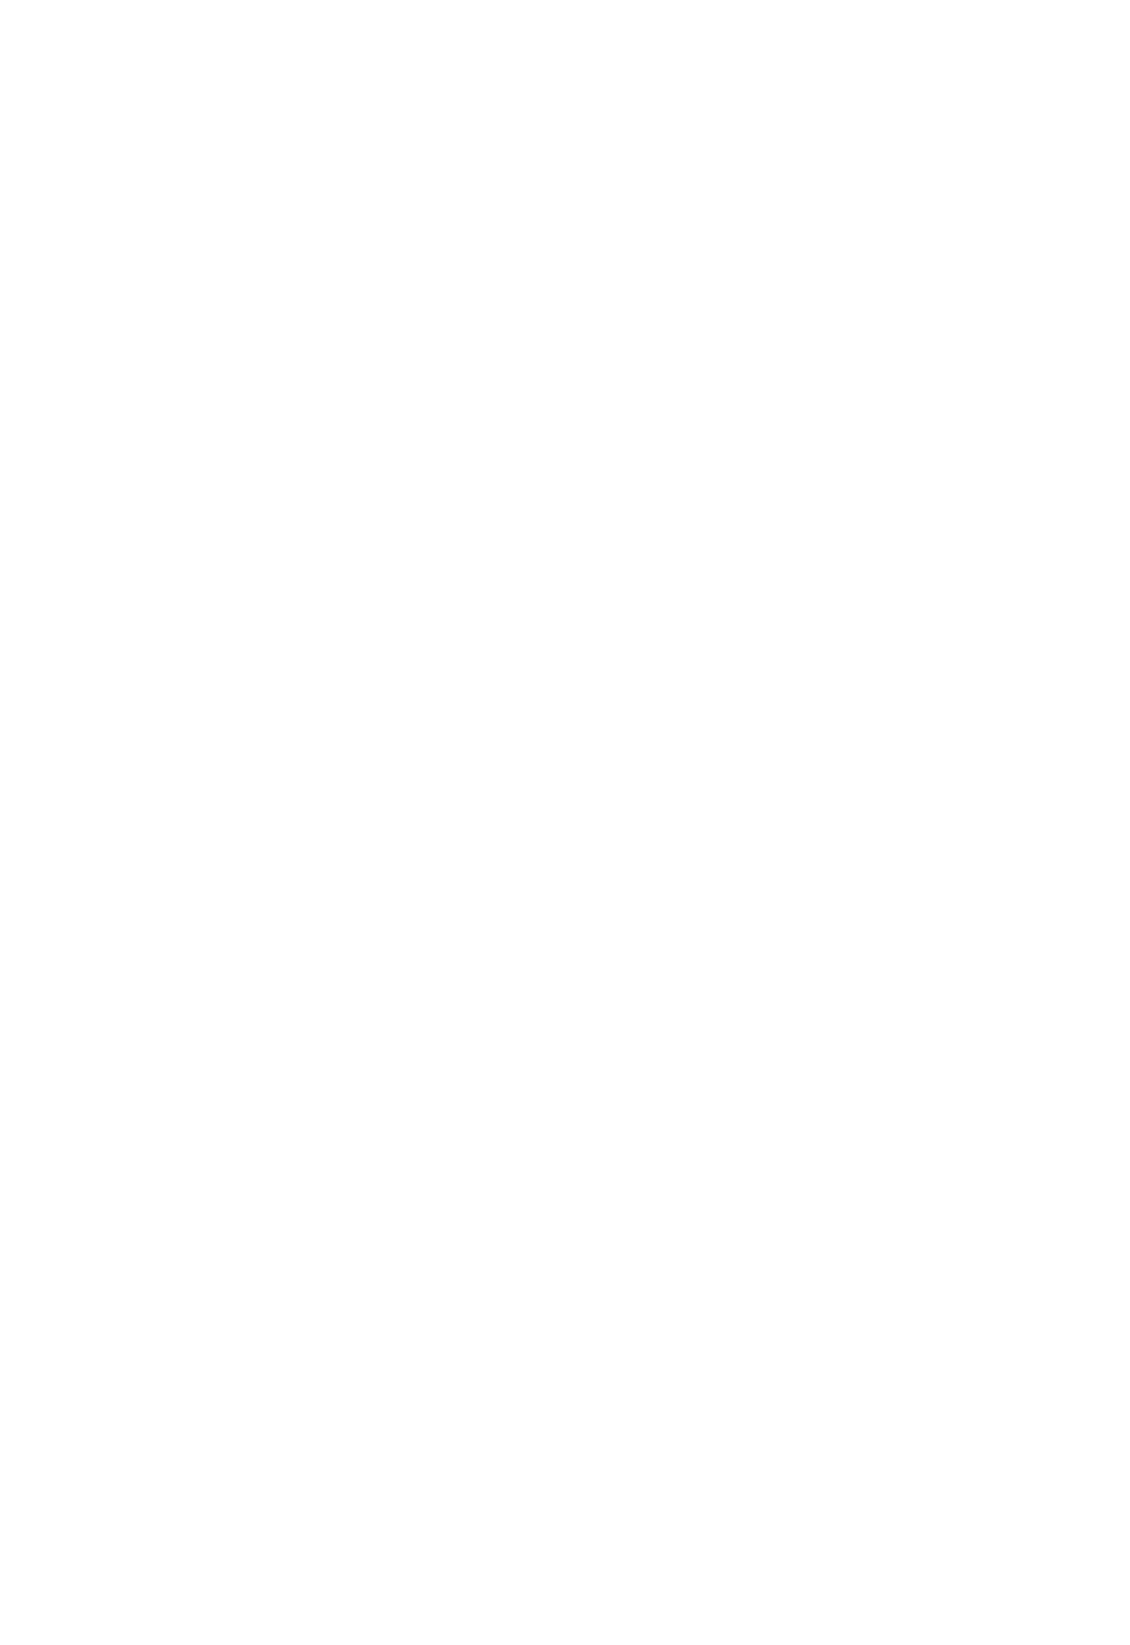

In [181]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, PageValues is the most important variable for predicting the Revenue.

**The tree above is very complex and difficult to interpret.**

## Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(estimator,y_test)

In [ ]:
get_recall_score(estimator)

**Recall has improved for both train and test set after hyperparameter tuning and we have a generalized model.**

## Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
#feature_names.remove('Experience')
print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.014 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002 retaining information and getting higher recall.**

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(best_model,y_test)

In [ ]:
get_recall_score(best_model)

## Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(10,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.002 ccp_alpha**

In [ ]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model2.fit(X_train, y_train)

In [ ]:
make_confusion_matrix(best_model2,y_test)

* We are able to identify more True positives - customers that are actually going to contribute to revenue than any other model.

In [ ]:
get_recall_score(best_model2)

* The results have improved from the initial model and we have got higher recall than the hyperparameter tuned model and generalized decision tree - having comparable performance on training and test set.

## Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Exit rates and ProductRelated duration are the top two important features to predict customer sessions contributing to Revenue.

## Comparing all the decision tree models

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[0.85,1,0.83,0.89], 'Test_Recall':[0.78,0.30,0.81,0.86]}) 
comparison_frame



**Decision tree model with post pruning has given the best recall score on data.**

### Conclusions

- We analyzed the "Online customers Purchasing Intention" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to contribute to Revenue generation (by purchasing) or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- ExitRates, ProductRelated_Duration, Month_Nov and BounceRates are the most important variable in predicting the customers that will contribute to the revenue. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

* According to the decision tree model - 

    a) If a customer lands on a page with an exit rate greater than 0.041 there's a very high chance the customer will not be contributing to the revenue.

    b) If a customer lands on a page with an exit rate less than 0.041 and spends more than ~5 minutes on a product related page then there is a very high chance that the customer is going to buy something and contribute to the revenue.


* It is observed that the more time the customers spend on Administrative, Informational and ProductRelated pages more is the likelihood of them contributing to the revenue. Although the website can not control the time spent by customers it can enhance the user experience on the website to engage them more on the website.

* Browsing Customers - Employ the predictive model to predict potential customers (customers who can buy the product), Offer limited-time coupons/discounts on a real-time basis only to those customers. This can also be employed for the customers in months like March, May, November, and December, as in those months, the traffic is higher so these months have potential buying users.

* It is observed that most of the traffic that the website sees is on the non-special days, While there is little to none traffic and revenue sessions on special days - the website should initiate schemes/offers on the special days to attract more customers on such days.

* May and November were the months where the website saw the highest traffic with further data it should be investigated what portfolios were running in those months and an inspiration to create more such portfolios can be drawn and implemented.

* Customer retention - Member Loyalty programs initiatives like special discounts, coupons, etc can be provided.

* Better resource management - Regular days (Non-weekend) days is when the website sees the most traffic, resources such as customer care services can be allocated more for these days.

* Website should be made more friendly, easily accessible, and feasible for other operating systems and browsers as new visitors seem to struggle with administrative pages.

* Site Engagement - Version of the site for slower-internet users, Consistent and user-friendly mobile website design for more browsers and operating systems.